## Analysis: population estimates by age, sex and race/ethnicity

By [Christine Zhang](mailto:czhang@baltsun.com)

The Baltimore Sun conducted an analysis of county-level population estimates for Baltimore — with comparison to other urban areas as well as Maryland counties — for a story published June 20, 2019 titled ["Baltimore's white population swells with millennials, resembling D.C., Brooklyn"](https://www.baltimoresun.com/maryland/baltimore-city/bs-md-census-estimate-population-race-20190619-story.html).

Here are the key findings of the data analysis:

- People in their mid-20s to mid-30s make up a substantial share of the white population in Baltimore, Brooklyn and several cities across the country. Washington, D.C. exhibits the most extreme example of this phenomenon
- In Baltimore, more than a quarter of white residents now fall into that age category; in 2000, about 16% did
- As of 2018, 37% of Baltimore residents within the age range were white and 51% were black; in 2000, it was 34% and 59%
- The age distribution of blacks, who have made up a majority of Baltimore’s population since 1970s, resembles how the city’s white age distribution looked back in 1990

## How we did it

### Run `01_processing.ipynb`

The raw data files from the Census Bureau were pre-processed prior to the analysis. See the processing notebook `01_processing.ipynb` for more details.

### Import R data analysis libraries

In [1]:
suppressMessages(library('tidyverse'))
suppressMessages(library('stringr'))

Read in the data saved in the `output/` folder for analysis.

In [2]:
data.90 <- suppressMessages(read_csv('output/data_1990.csv'))
data.md.00 <- suppressMessages(read_csv('output/data_md_2000.csv'))
data.18 <- suppressMessages(read.csv('output/data_2018.csv', stringsAsFactors = F))

data.18 <- data.18 %>% mutate(STATE = str_pad(STATE, width = 2, pad = "0"),
                              COUNTY = str_pad(COUNTY, width = 3, pad = "0"))

### Finding: People in their mid-20s to mid-30s make up a substantial share of the white population in Baltimore, Brooklyn and several cities across the country

In [31]:
data.18 <- data.18 %>% 
           filter(AGEGRP != 0 & race != 'all') %>% 
           group_by(STATE, STNAME, COUNTY, YEAR) %>%
  mutate(total.pop = sum(value)) %>%
  ungroup() %>%
  group_by(STATE, STNAME, COUNTY, YEAR, race_name, sex) %>%
  mutate(total.by.race_sex = sum(value)) %>%
  mutate(perc = (value/total.by.race_sex) * 100)

In [32]:
data.18 <- data.18 %>% 
  mutate(fips = paste0(STATE, COUNTY),
         name = case_when(CTYNAME == 'Baltimore city' ~ 'Baltimore',
                          CTYNAME == 'Kings County' ~ 'Brooklyn',
                          CTYNAME == 'New York County' ~ 'CManhattan',
                          TRUE ~ CTYNAME)) 

Make population pyramid plots which show skewed age distributions for the cities

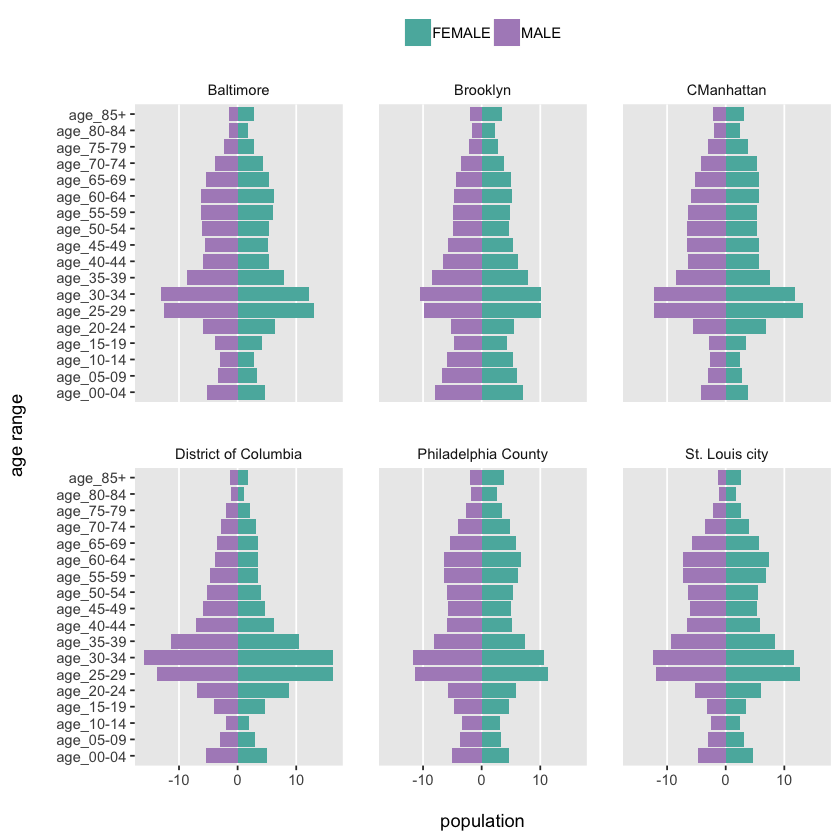

In [5]:
data.18 <- data.18 %>% 
  mutate(perc2 = ifelse(sex == 'MALE', perc*-1, perc))

ggplot(data.18 %>% filter(AGEGRP != 0 & 
                          YEAR == 11 & 
                          sex != 'POP' &
                          fips %in% c('24510', '36047', '36061', '42101', '29510', '11001') & 
                          race_name %in% c('White'))) +
  geom_bar(aes(x = age_name, y = perc2, 
               fill = sex), stat = 'identity') +
  facet_wrap(~name) + 
  coord_flip() + 
  scale_fill_manual(values = c('#5ab4ac',
                               '#af8dc3')) +
  labs(x = 'age range\n', y = '\npopulation') +
  theme(panel.grid.minor.y = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        strip.background = element_blank(),
        legend.position = 'top',
        legend.title = element_blank(),
        panel.spacing = unit(1.5, "lines"))

plot1 <- ggplot(data.18 %>% filter(AGEGRP != 0 & 
                          YEAR == 11 & 
                          sex != 'POP' &
                          fips %in% c('24510', '36047', '36061', '42101', '29510', '11001') & 
                          race_name %in% c('White'))) +
  geom_bar(aes(x = age_name, y = perc2, 
               fill = sex), stat = 'identity') +
  facet_wrap(~name, nrow = 1) + 
  coord_flip() + 
  scale_fill_manual(values = c('#5ab4ac',
                               '#af8dc3')) +
  labs(x = 'age range\n', y = '\npopulation') +
  theme(panel.grid.minor.y = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        strip.background = element_blank(),
        legend.position = 'top',
        legend.title = element_blank(),
        panel.spacing = unit(1.5, "lines"))

ggsave('output/plot1.png', plot1, width = 15, height = 5)
ggsave('output/plot1.eps', plot1, width = 15, height = 6) # for Illustrator

Washington, D.C. is particularly skewed, with hardly any "bulge" in the older age brackets.

### Finding: In Baltimore, more than a quarter of white residents now fall into that age category; in 2000, about 16% did

Summarize the 2018 data to see how many white residents were in the 25-34 age category.

In [6]:
balt.18.sum.white <- data.18 %>% filter(CTYNAME == 'Baltimore city' & 
                     year_name == 2018 & (race_name == 'White')) %>% 
                     ungroup() %>% group_by(age_name, race_name) %>% summarise(n = sum(value)) %>% ungroup() %>% 
                     mutate(tot = sum(n), perc = (n/tot)*100)

In [7]:
balt.18.sum.white

age_name,race_name,n,tot,perc
age_00-04,White,8324,167248,4.977040
age_05-09,White,5564,167248,3.326796
age_10-14,White,4777,167248,2.856237
age_15-19,White,6713,167248,4.013800
age_20-24,White,10177,167248,6.084976
age_25-29,White,21470,167248,12.837224
age_30-34,White,21108,167248,12.620779
age_35-39,White,13835,167248,8.272147
age_40-44,White,9452,167248,5.651488
age_45-49,White,8959,167248,5.356716


Sum the age group totals for age_25-29 and age_30-34 to get the percentage.

In [8]:
balt.18.sum.white[balt.18.sum.white$age_name == 'age_25-29',]$perc + 
balt.18.sum.white[balt.18.sum.white$age_name == 'age_30-34',]$perc

[1] 25.458

Summarize the 2000 data to see how many white residents were in the 25-34 age category.

In [9]:
balt.00.sum.white <- data.md.00 %>% filter(CTYNAME == 'Baltimore city' & age_name != 'total' &
                     year_name == 2000 & (race_name == 'White')) %>% 
                     ungroup() %>% group_by(age_name, race_name) %>% summarise(n = sum(value)) %>% ungroup() %>% 
                     mutate(tot = sum(n), perc = (n/tot)*100)

Sum the age group totals for age_25-29 and age_30-34 to get the percentage.

In [10]:
balt.00.sum.white[balt.00.sum.white$age_name == 'age_25-29',]$perc + 
balt.00.sum.white[balt.00.sum.white$age_name == 'age_30-34',]$perc

[1] 15.82577

### Finding: As of 2018, 37% of Baltimore residents within the age range were white and 51% were black; in 2000, it was 35% and 53%

Summarize the 2018 data to see the race distribution of people in the age categories of `age_25-29` and `age_30-34`

In [11]:
balt.18.sum.age_25_34 <- data.18 %>% filter(CTYNAME == 'Baltimore city' & age_name != 'total' & 
                                            race != 'all' & 
                                            year_name == 2018) %>% 
                                 group_by(age_name, race, race_name) %>%
                                 summarise(value = sum(value)) %>% filter(age_name == 'age_25-29' | 
                                                                          age_name == 'age_30-34') %>%
ungroup() %>% mutate(tot.25_34 = sum(value)) %>%
ungroup() %>% group_by(race_name, tot.25_34) %>% 
summarise(tot.race.25_34 = sum(value)) %>% mutate(perc = (tot.race.25_34/tot.25_34) * 100)

In [12]:
balt.18.sum.age_25_34

race_name,tot.25_34,tot.race.25_34,perc
American Indian and Alaska Native,115483,233,0.20176130
Asian,115483,5182,4.48724055
Black,115483,59204,51.26642017
Hispanic,115483,6247,5.40945421
Multiple,115483,2001,1.73272257
Native Hawaiian and Other Pacific Islander,115483,38,0.03290528
White,115483,42578,36.86949594


Summarize the 2000 data to see the race distribution of people in the age category

In [13]:
balt.00.sum.age_25_34 <- data.md.00 %>% filter(CTYNAME == 'Baltimore city' & age_name != 'total' & 
                                            race != 'all' & 
                                            year_name == 2000) %>% 
                                 group_by(age_name, race, race_name) %>%
                                 summarise(value = sum(value)) %>% filter(age_name == 'age_25-29' | 
                                                                          age_name == 'age_30-34') %>%
ungroup() %>% mutate(tot.25_34 = sum(value)) %>%
ungroup() %>% group_by(race_name, tot.25_34) %>% 
summarise(tot.race.25_34 = sum(value)) %>% mutate(perc = (tot.race.25_34/tot.25_34) * 100)

In [14]:
balt.00.sum.age_25_34

race_name,tot.25_34,tot.race.25_34,perc
American Indian and Alaska Native,92467,244,0.26387792
Asian,92467,2710,2.93077530
Black,92467,54254,58.67390529
Hispanic,92467,2420,2.61714990
Multiple,92467,908,0.98197195
Native Hawaiian and Other Pacific Islander,92467,37,0.04001428
White,92467,31894,34.49230536


### Finding: The age distribution of blacks, who have made up a majority of Baltimore’s population since 1970s, resembles how the city’s white age distribution looked back in 1990

Plot the age distribution of blacks in 2018

In [15]:
balt.18 <- data.18 %>% filter(year_name == 2018 & sex != 'POP' &
                              AGEGRP != 0 &
                          fips %in% c('24510'))

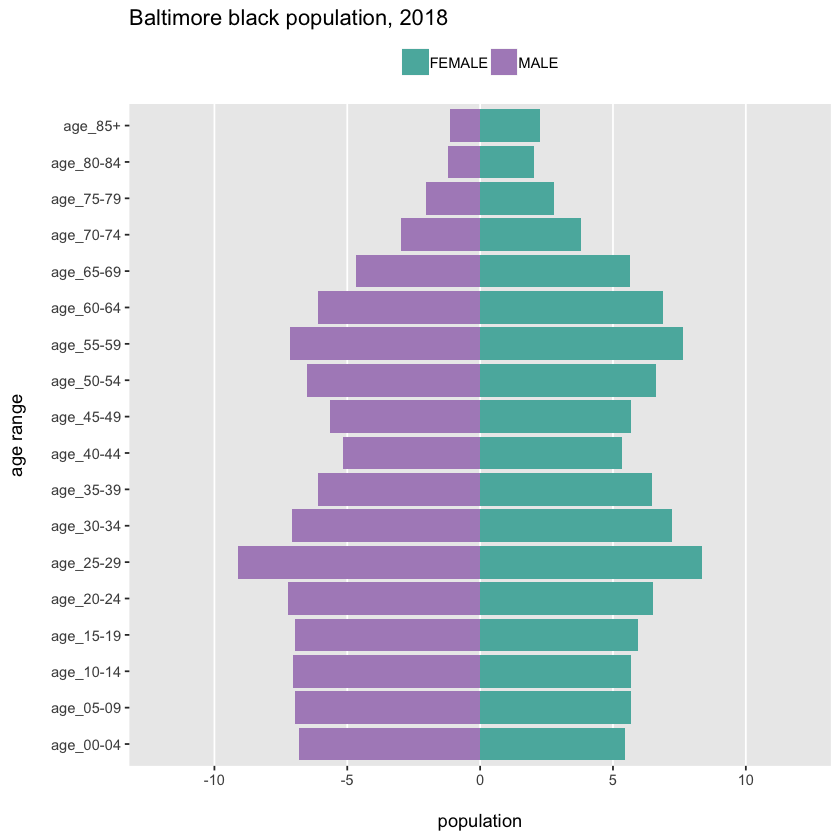

In [16]:
ggplot(data.18 %>% filter(AGEGRP != 0 & 
                          YEAR == 11 & 
                          sex != 'POP' &
                          fips %in% c('24510') & 
                          race_name %in% c('Black'))) +
  geom_bar(aes(x = age_name, y = perc2, 
               fill = sex), stat = 'identity') +
  coord_flip() + 
  scale_fill_manual(values = c('#5ab4ac',
                               '#af8dc3')) +
  labs(x = 'age range\n', y = '\npopulation') +
  theme(panel.grid.minor.y = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        legend.position = 'top',
        legend.title = element_blank()) +
  scale_y_continuous(limits = c(-12,12)) + ggtitle('Baltimore black population, 2018')

ggsave('output/plot2_2018.png', width = 6, height = 8)
ggsave('output/plot2_2018.eps', width = 6, height = 8) # Illustrator

Plot the age distribution of whites in 1990

In [17]:
balt.data.90 <- data.90 %>% filter(fips == '24510' & 
                             race == 'White' & 
                             hisp == 'not_Hispanic' & year == 1990) %>%
  group_by(fips, race, sex) %>%
  mutate(race.sex.total = sum(pop)) %>%
  mutate(perc = (pop/race.sex.total) * 100)

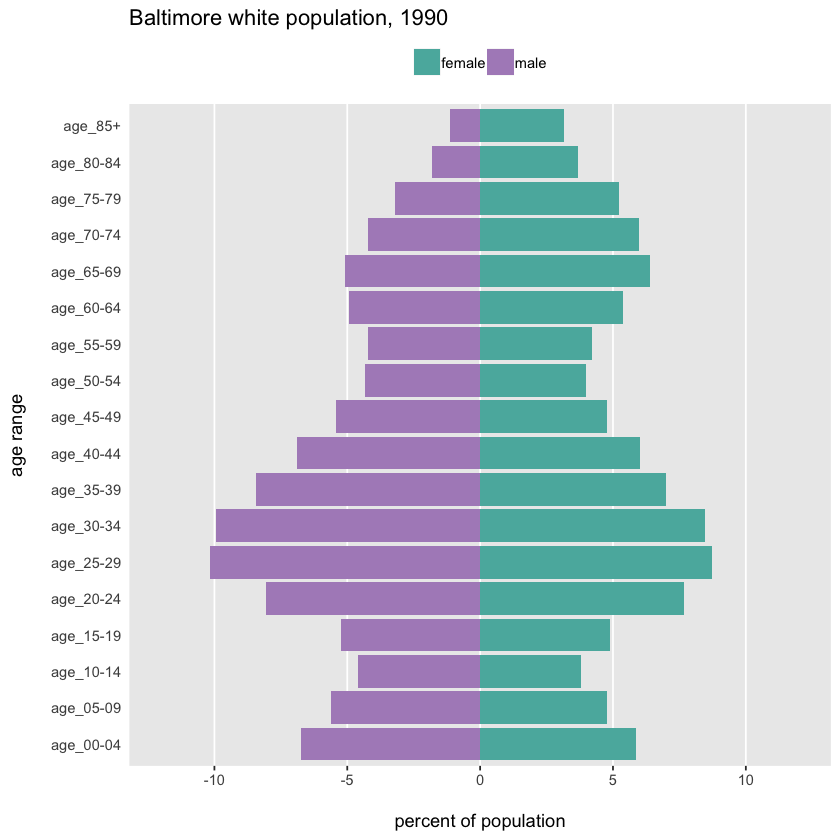

In [18]:
balt.data.90 <- data.90 %>% filter(fips == '24510' & 
                             race == 'White' & 
                             hisp == 'not_Hispanic' & year == 1990) %>%
  group_by(fips, race, sex) %>%
  mutate(race.sex.total = sum(pop)) %>%
  mutate(perc = (pop/race.sex.total) * 100)

balt.data.90 <- balt.data.90 %>% 
  mutate(perc2 = ifelse(sex =='male', perc*-1, perc))

ggplot(balt.data.90)  +
         geom_bar(aes(x = age_name, y = perc2, 
                      fill = sex), stat = 'identity') +
         coord_flip() + 
         scale_fill_manual(values = c('#5ab4ac',
                                      '#af8dc3')) +
         labs(x = 'age range\n', y = '\npercent of population') +
         theme(axis.ticks.y = element_blank(),
               panel.grid.minor.y = element_blank(),
               panel.grid.major.y = element_blank(),
               panel.grid.minor.x = element_blank(),
               strip.background = element_blank(),
               legend.position = 'top',
               legend.title = element_blank()) +
  scale_y_continuous(limits = c(-12,12)) + ggtitle('Baltimore white population, 1990')

ggsave('output/plot2_1990.png', width = 6, height = 8) 
ggsave('output/plot2_1990.eps', width = 6, height = 8) #Illustrator

### Plot: White population between 25 and 34 in Maryland by county as a percentage of total white population

In [19]:
data.18.sum <- data.18 %>% filter(AGEGRP != 0 & 
                                   YEAR == 11 & 
                                   sex != 'POP' &
                                   STATE == '24'&
                                   race_name %in% c('White')) %>%
  mutate(yp = case_when(age_name == 'age_25-29' | 
                        age_name == 'age_30-34' ~ 1, TRUE ~ 0))%>%
  group_by(fips, CTYNAME, age_name, race_name, yp)  %>% 
  summarise(n = sum(value)) %>%
  ungroup() %>%
  group_by(CTYNAME, yp) %>%
  summarise(n  = sum(n)) %>%
  mutate(perc = (n/sum(n)) * 100) %>%
  filter(yp == 1)

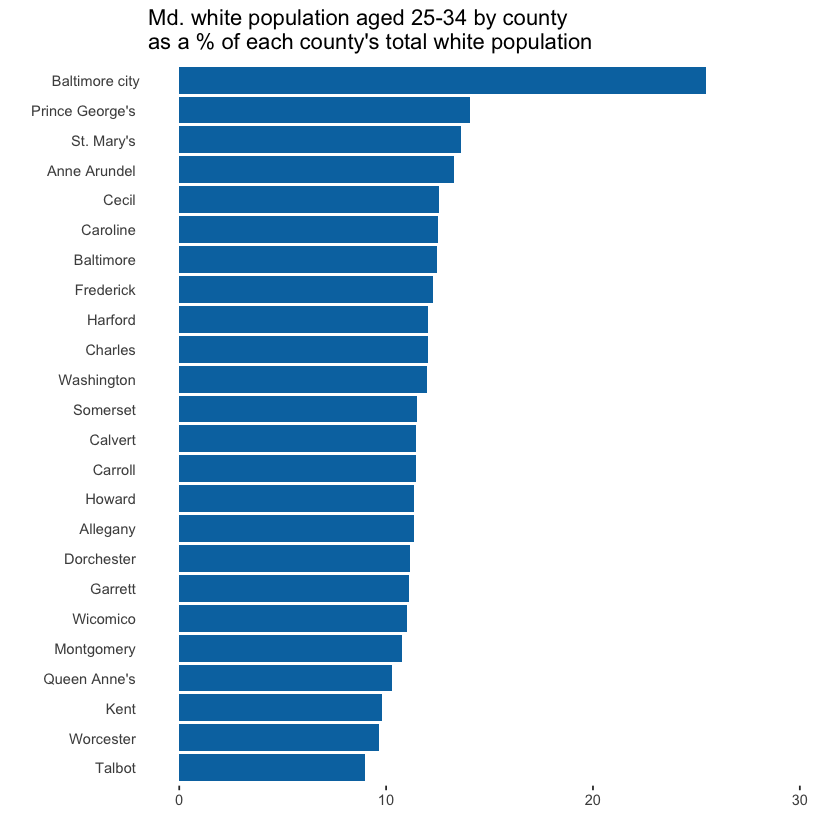

In [23]:
data.18.sum$CTYNAME <- gsub("County", "", data.18.sum$CTYNAME)

data.18.sum$county.factor = 
  factor(data.18.sum$CTYNAME, 
         levels = data.18.sum$CTYNAME[order(data.18.sum$perc)])          

ggplot(data.18.sum,
       aes(x = county.factor, 
           y = perc)) + 
  geom_bar(stat = 'identity', fill = '#0075b0') + 
  coord_flip() +
  theme(panel.grid.minor.y = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.background = element_blank(),
        legend.position = 'top',
        axis.ticks.y = element_blank(),
        legend.title = element_blank(),
        panel.spacing = unit(1.5, "lines")) +
  labs(x='', y = '') +
  scale_y_continuous(limits = c(0, 30)) + ggtitle("Md. white population aged 25-34 by county\nas a % of each county's total white population")

ggsave('output/plot3.png', width = 8, height = 6)
ggsave('output/plot3.eps', width = 8, height = 6) #Illustrator